In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
synth_data = np.load(Path.home()/'group'/'project'/'datasets'/'data'/'230412_jugaad_analysis'/'230119_cleaned_phase_errors.npy')
jugaad_data = np.load(Path.home()/'group'/'project'/'datasets'/'data'/'230412_jugaad_analysis'/'230119_cleaned_phase_errors_jugaad_single_freq.npy')


In [3]:
sns.set_theme(context='talk', style='whitegrid',font_scale=1.2)
clist = sns.color_palette('bright')

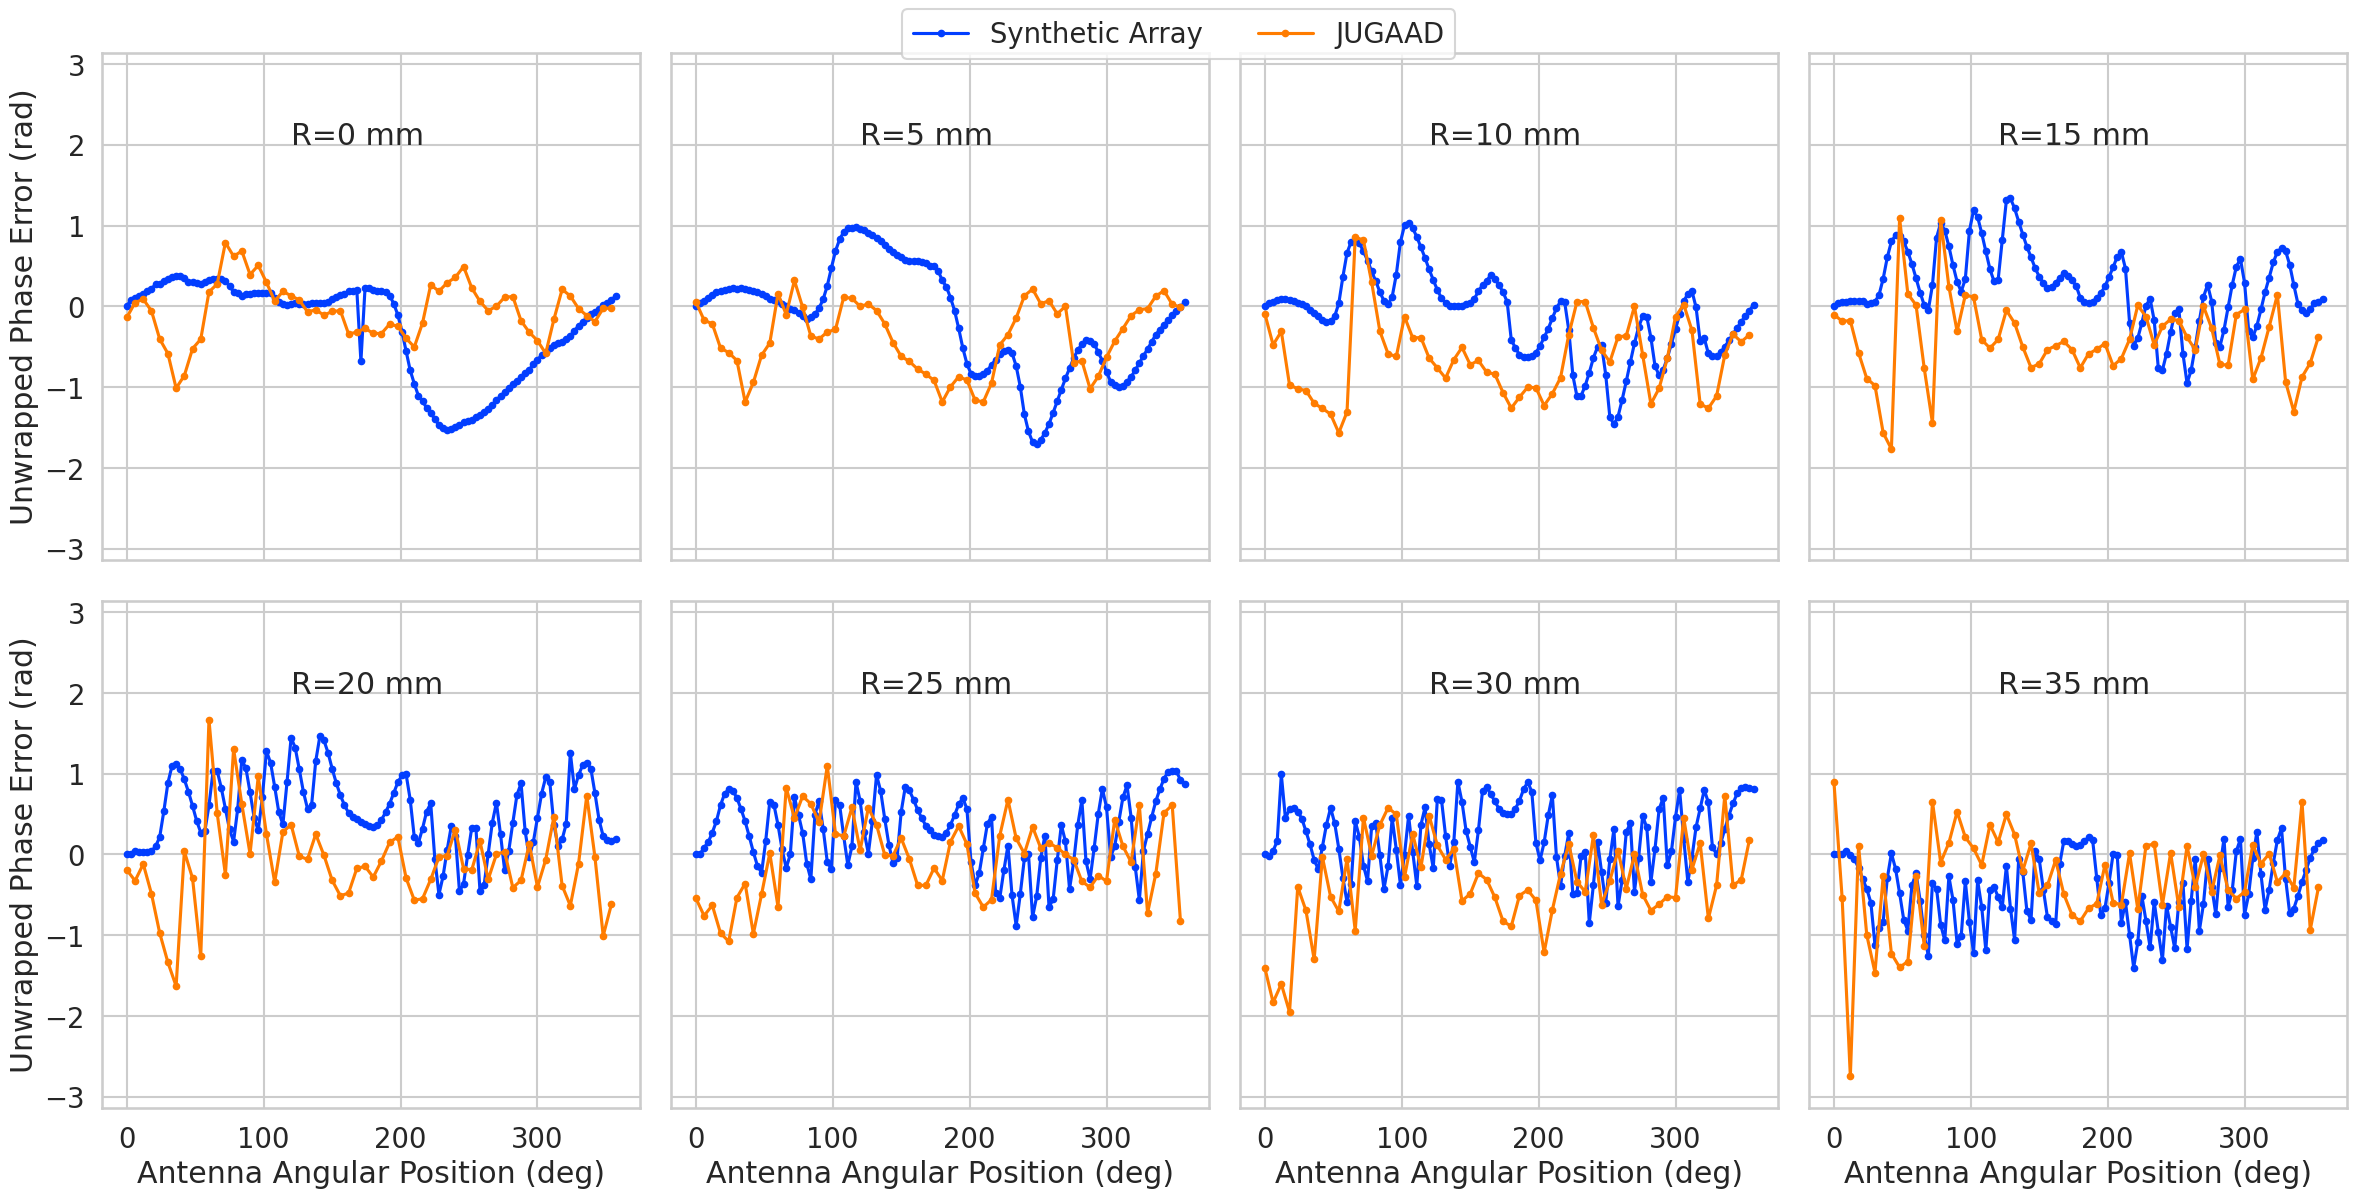

In [4]:
axial_inds = [0,]
axii = [0,5,10]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=True,sharey=True, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[i_rad].plot(
            np.arange(0,360,3),
            synth_data[i_ax,i_rad,:],
            color=clist[0],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        axs[i_rad].plot(
            np.arange(0,360,6),
            np.roll(jugaad_data[i_ax,i_rad,70,:], -15),
            color=clist[1],
            marker='.',
            ls='-',
            #markersize='15',
            label='Jugaad'
        )
        #axs[i_rad].legend(loc=1)
        axs[i_rad].set_ylim(-np.pi,np.pi)
        #axs[i_rad].set_title(f' = {radii[i_rad]} mm')
        
        if i_rad %4 == 0:
            axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
        if i_rad > 3:
            axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        
        axs[i_rad].text(120, 2, f'R={radii[i_rad]} mm')
        
    plt.tight_layout(pad=1.05)
    name = f'230414_synthetic_array_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)
    
    line_synth, = plt.plot([],[],color=clist[0],ls='-',marker='.')
    line_jugaad, = plt.plot([],[],color=clist[1],ls='-',marker='.')
    
    fig.legend(
        [line_synth, line_jugaad],
        ['Synthetic Array', 'JUGAAD'],
        loc='upper center',
        bbox_to_anchor=(0.5,1.02),
        ncols=2
    )
    #plt.savefig(Path.home()/'group'/'project'/'plots'/name, dpi=150)

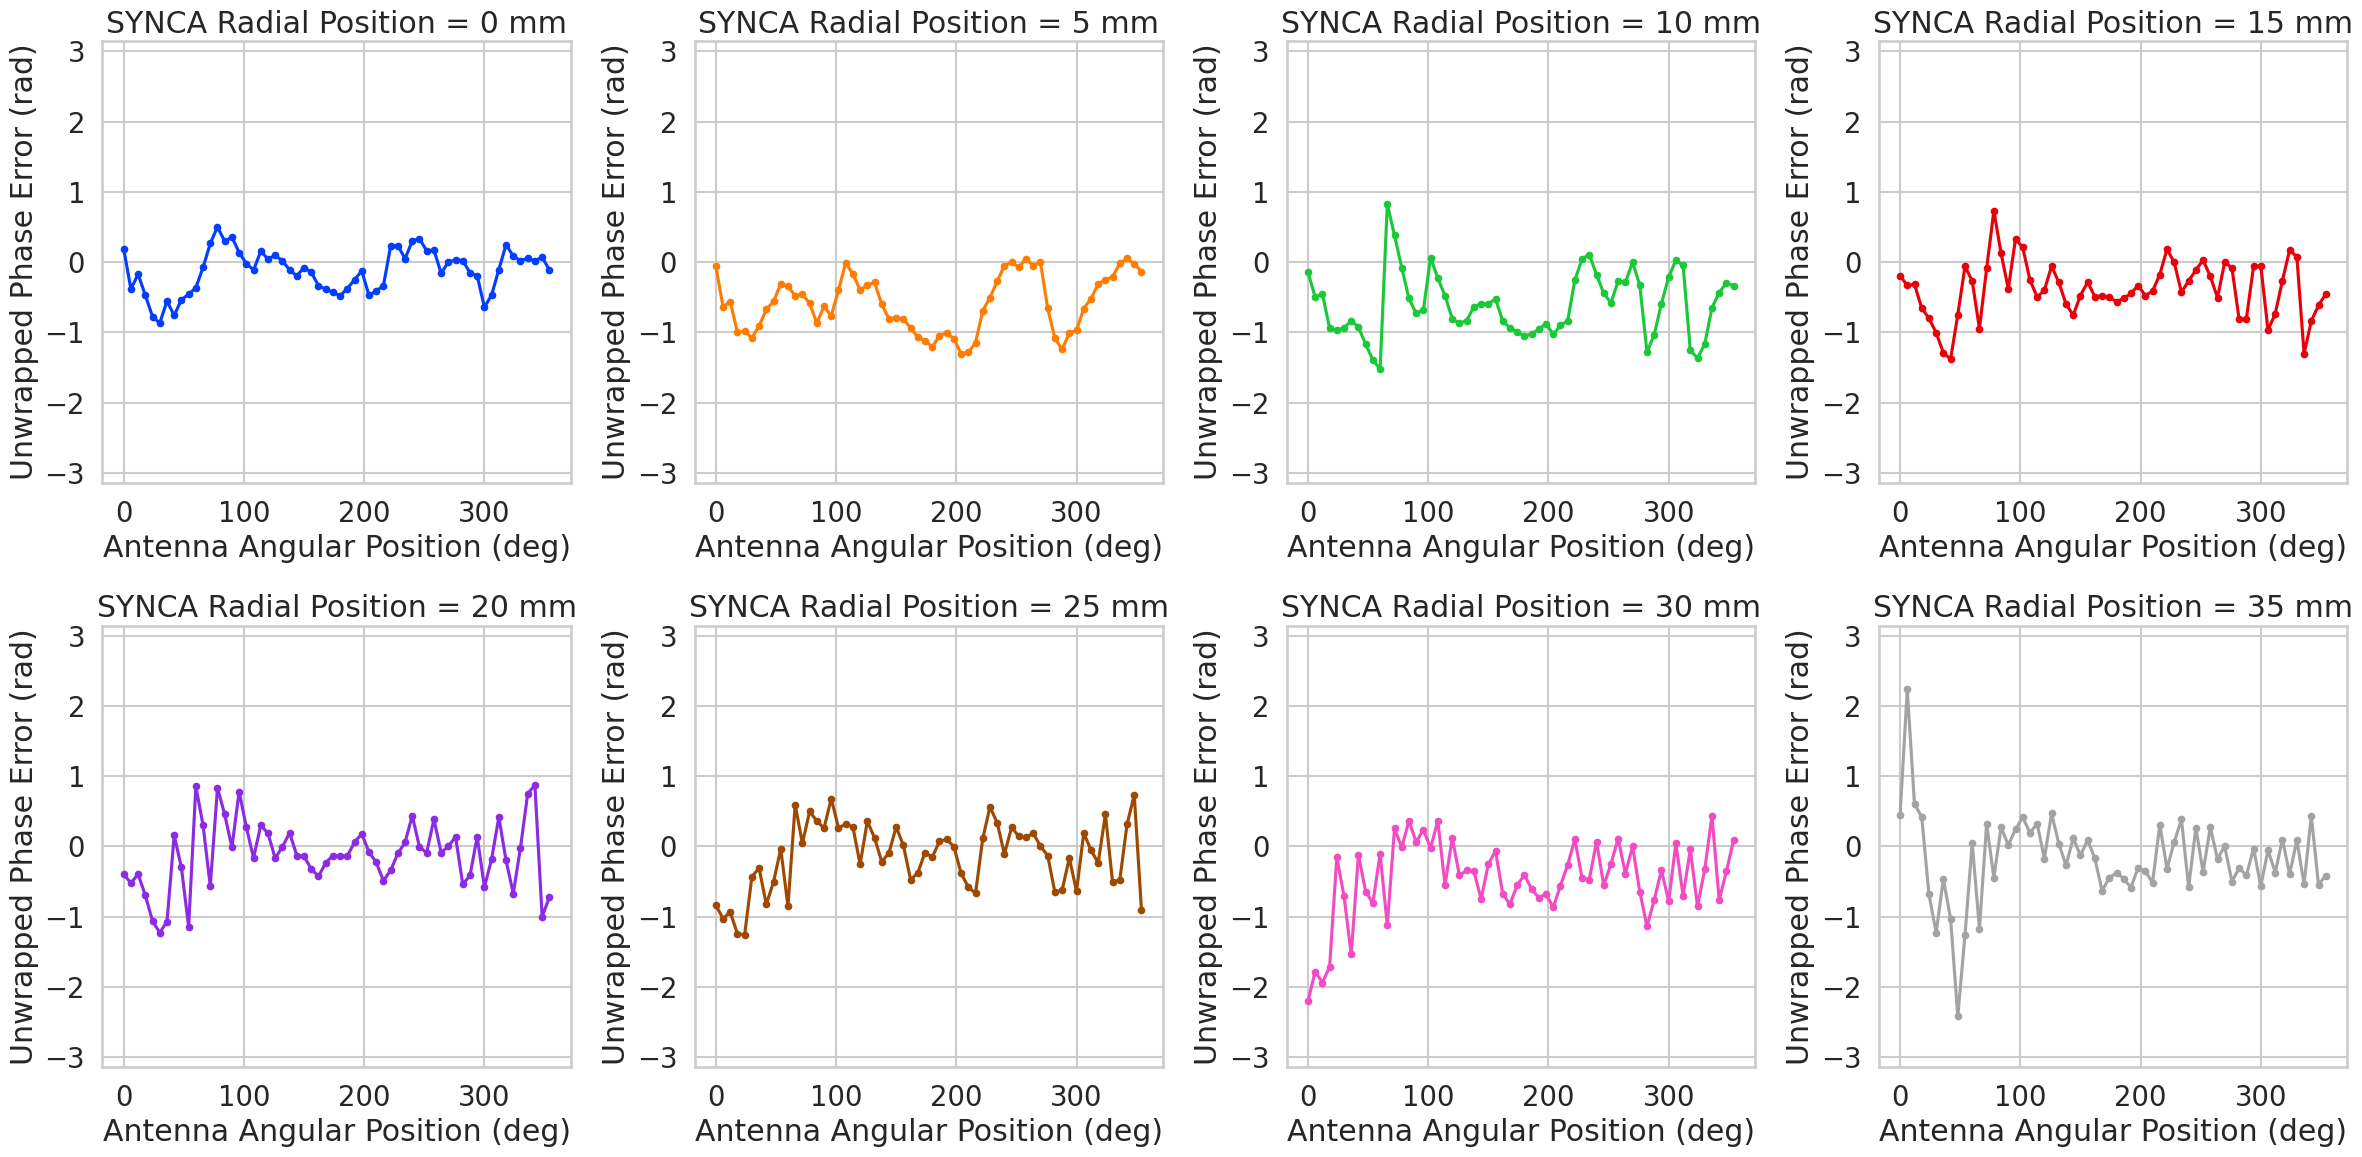

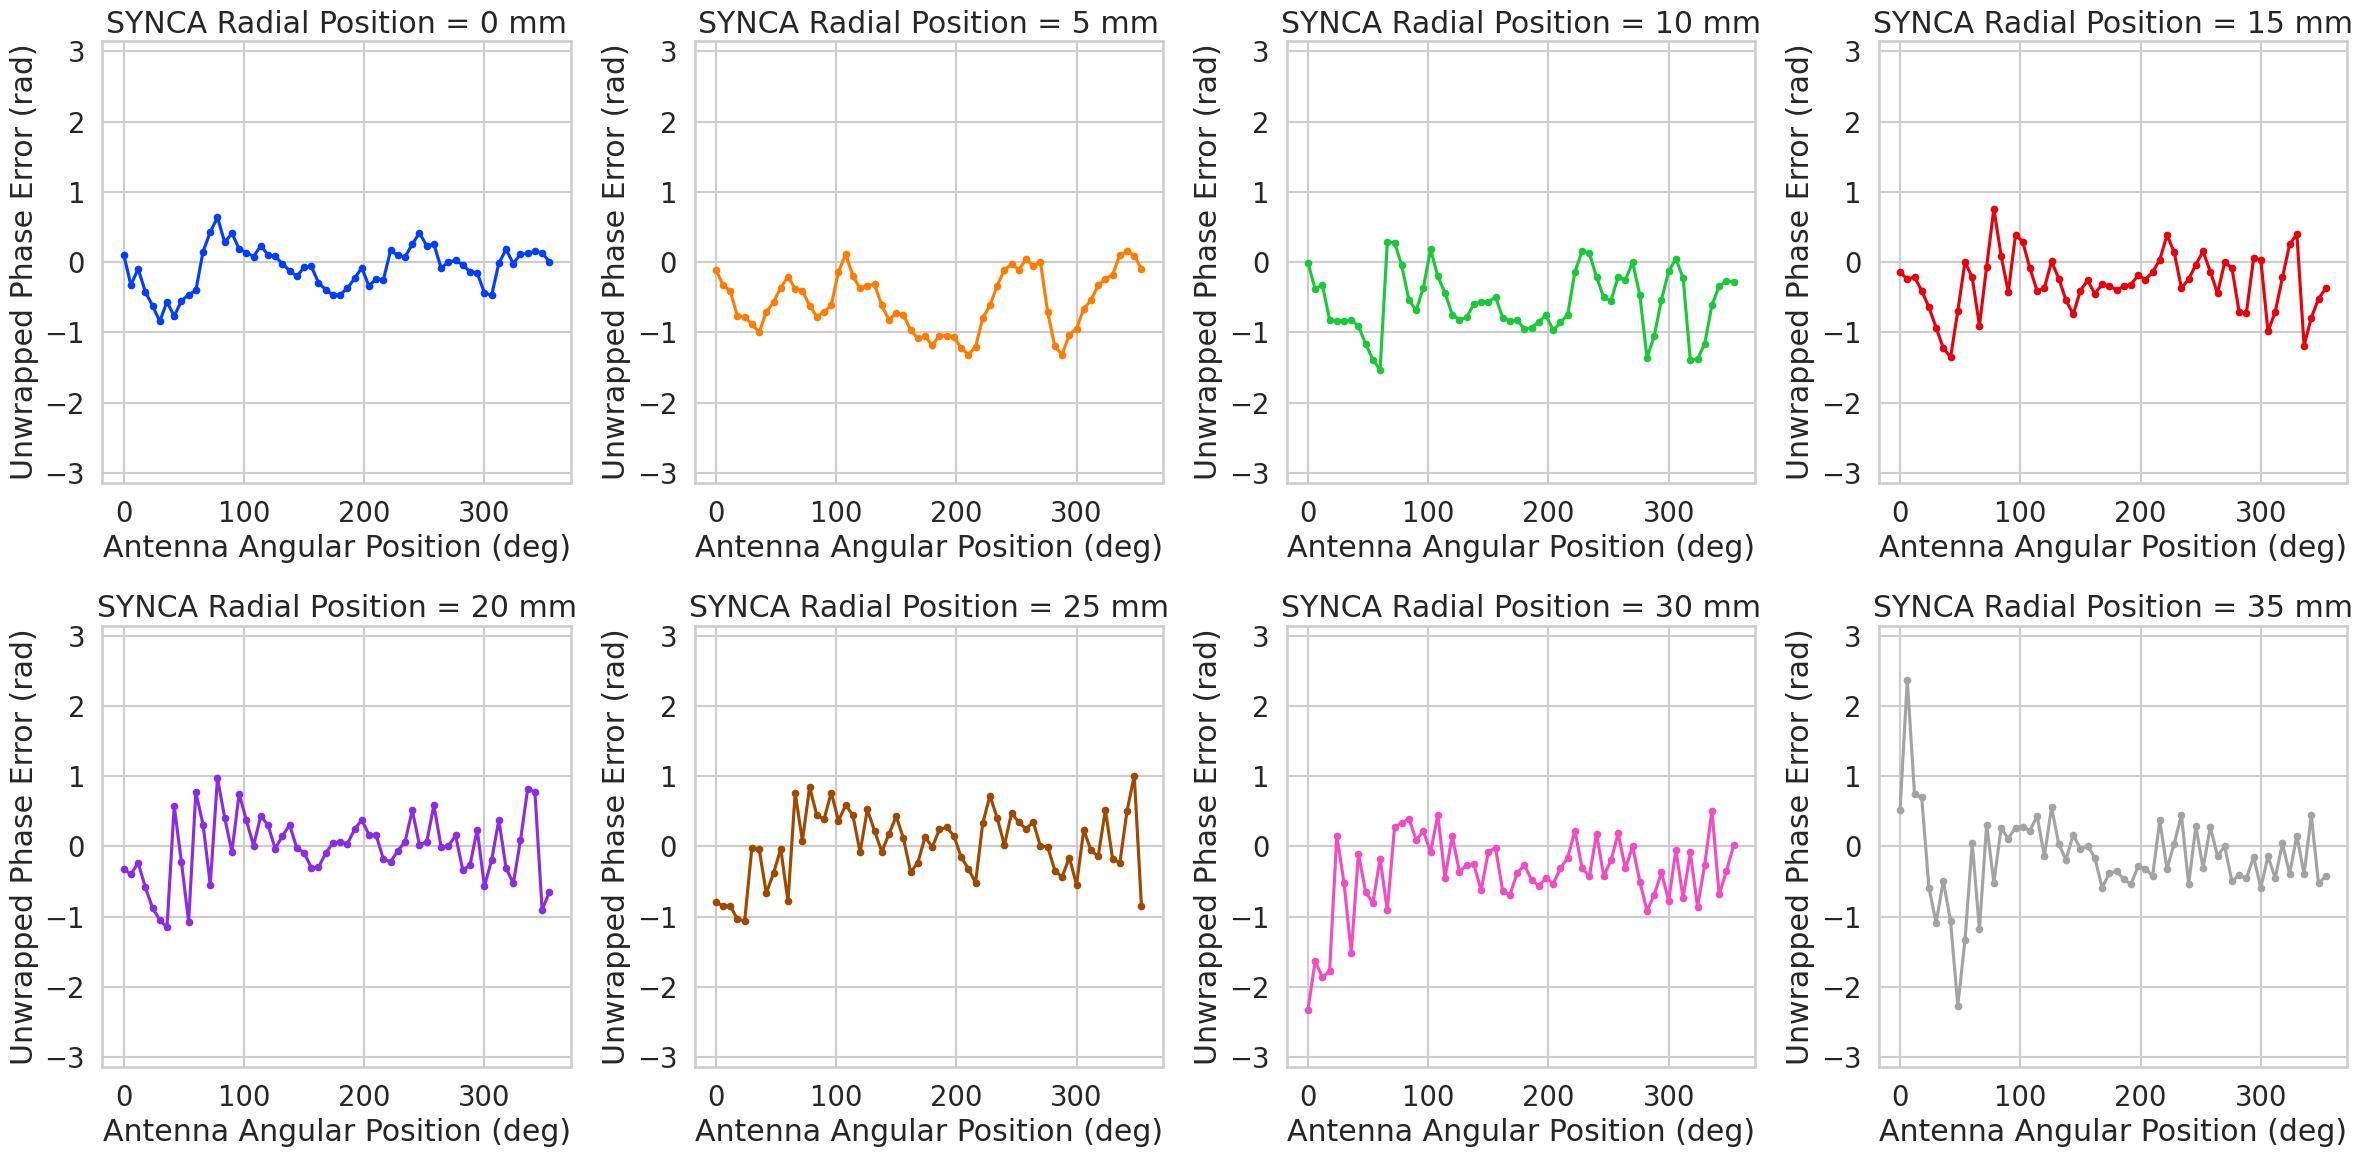

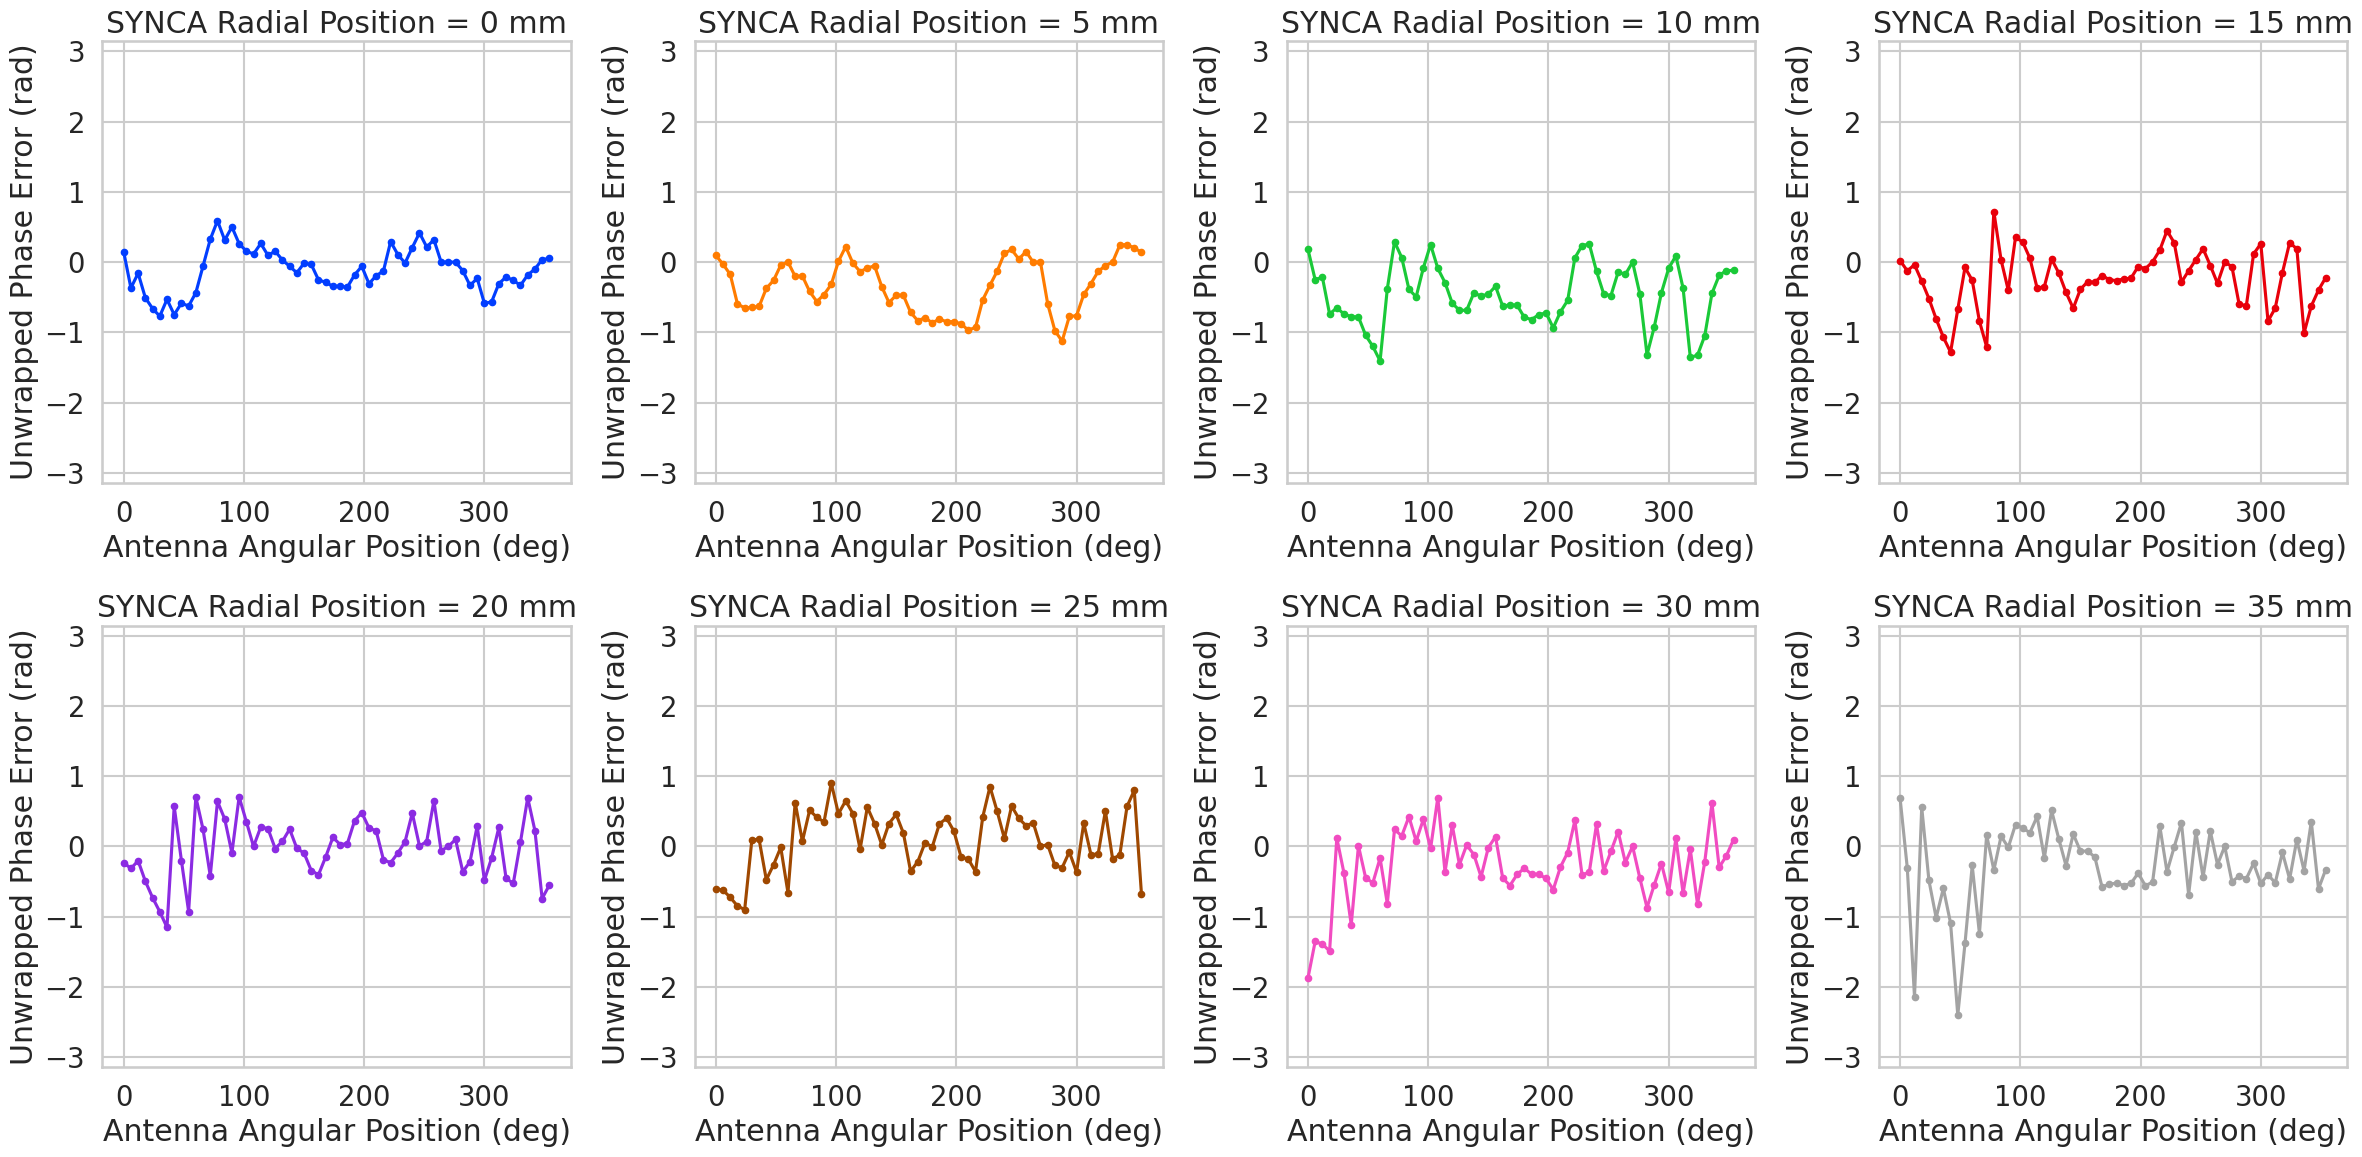

In [5]:
axial_inds = [0,1,2]
axii = [0,5,10]
radial_inds = np.arange(0,8,1)
radii = np.arange(0,40,5)
sns.set_theme(context='talk',style='whitegrid',font_scale=1.2)
###

for i_ax in axial_inds:
    fig,axs = plt.subplots(2,4,sharex=False,sharey=False, figsize=(24, 12))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[i_rad].plot(
            np.arange(0,360,6),
            np.roll(jugaad_data[i_ax,i_rad,75,:],-15),
            color=clist[i_rad],
            marker='.',
            ls='-',
        #    markersize='15',
        )
        #axs[i_rad].plot(
        #    np.arange(0,360,6),
        #    jugaad_data[i_ax,i_rad,70,:],
        #    color='b',
        #    marker='.',
        #    ls='-',
        #    markersize='15',
        #    label='Jugaad'
        #)
        #axs[i_rad].legend(loc=1)
        axs[i_rad].set_ylim(-np.pi,np.pi)
        axs[i_rad].set_title(f'SYNCA Radial Position = {radii[i_rad]} mm')
        axs[i_rad].set_xlabel('Antenna Angular Position (deg)')
        axs[i_rad].set_ylabel('Unwrapped Phase Error (rad)')
    plt.tight_layout(pad=1.05)
    name = f'230123_jugaad_phase_error_curves_z{axii[i_ax]}'
    #plt.savefig(Path.home()/'iCloud'/'plots'/name, dpi=144)


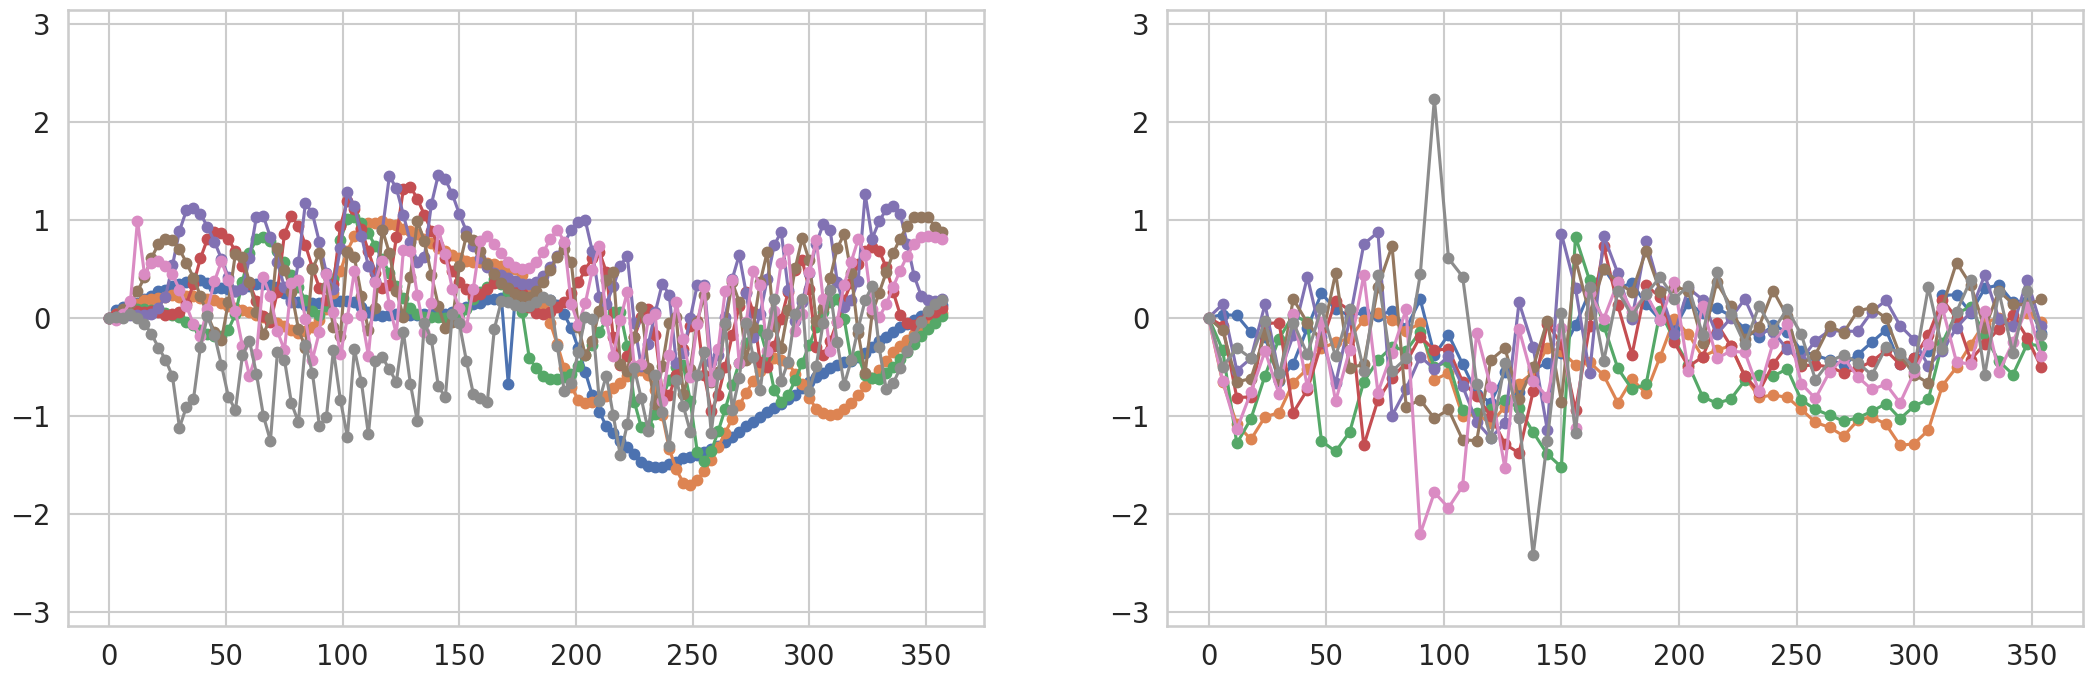

In [6]:
axial_inds = [0]
radial_inds = np.arange(0,8,1)

###

for i_ax in axial_inds:
    fig,axs = plt.subplots(1,2,sharex=False,sharey=False, figsize=(26, 8))
    axs=axs.flatten()
    for i_rad in radial_inds:
        axs[0].plot(
            np.arange(0,360,3),
            synth_data[i_ax,i_rad,:],
            #color='r',
            marker='.',
            ls='-',
            markersize='15',
            label='Synthetic Array'
        )
        axs[1].plot(
            np.arange(0,360,6),
            jugaad_data[i_ax,i_rad,75,:],
            #color='b',
            marker='.',
            ls='-',
            markersize='15',
            label='Jugaad'
        )
        #axs[i_rad].legend(loc=1)
    axs[0].set_ylim(-np.pi,np.pi)
    axs[1].set_ylim(-np.pi,np.pi)

    

        

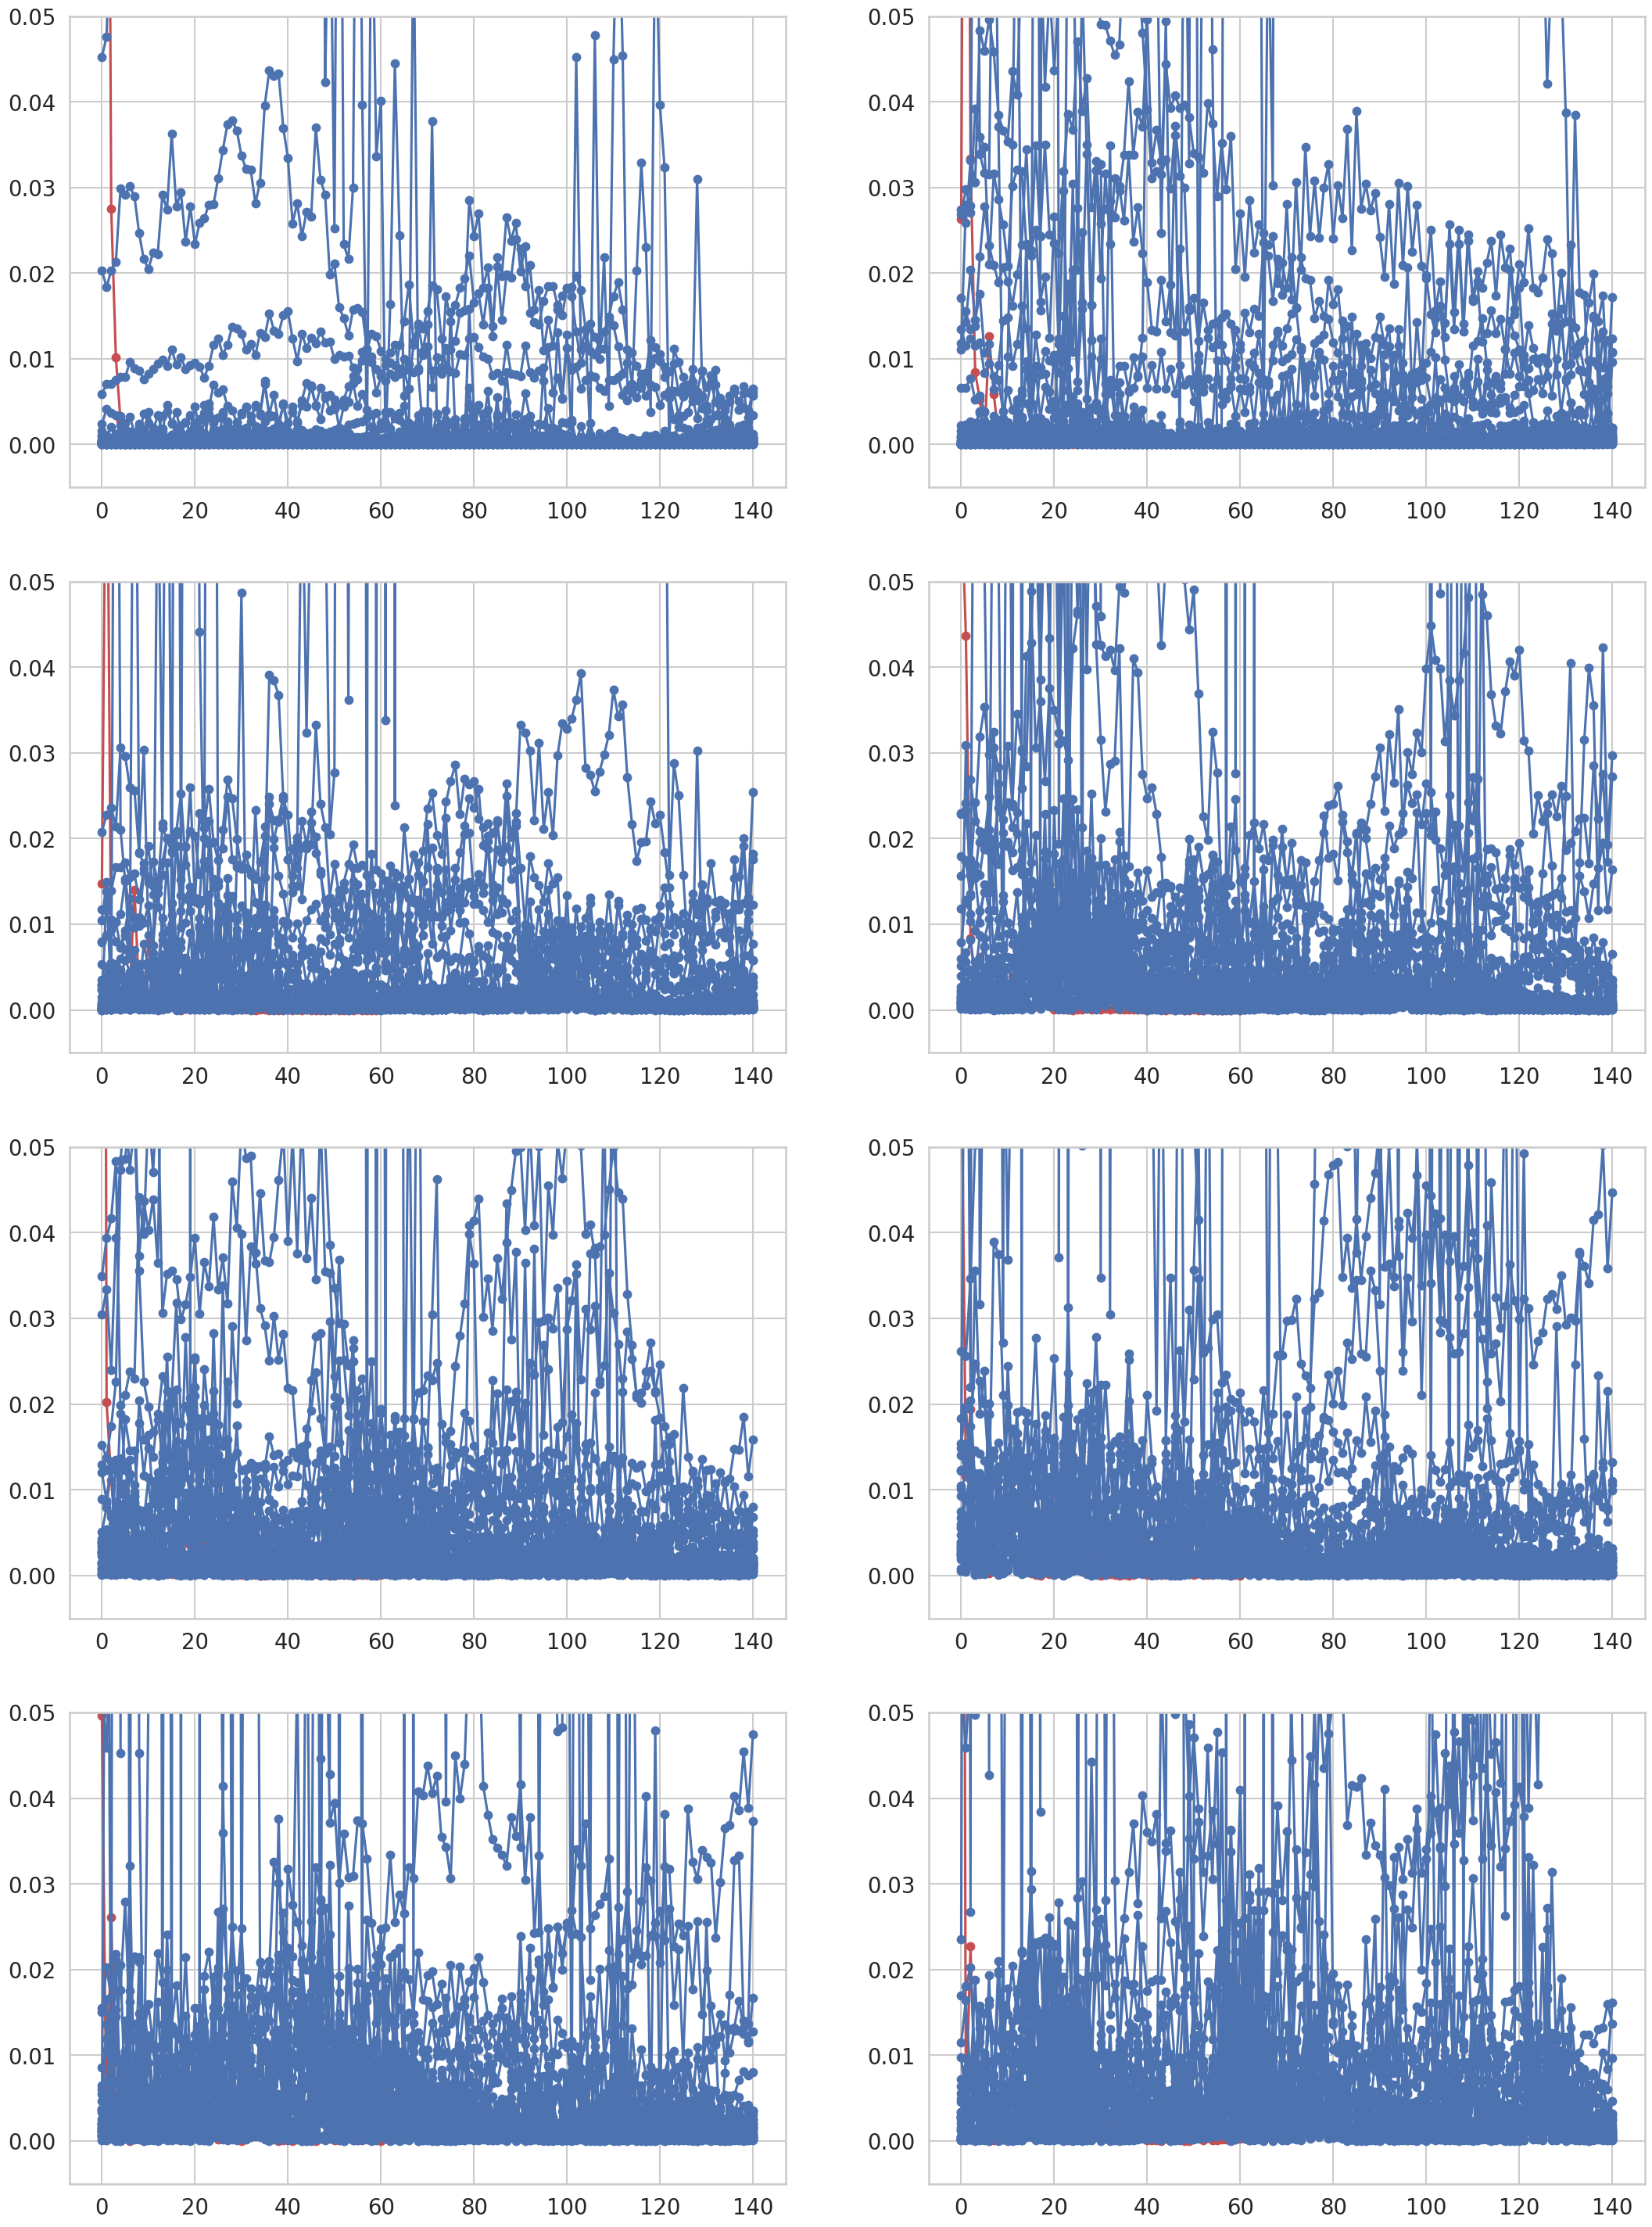

In [7]:
axial_inds = [0]
radial_inds = np.arange(0,8,1)


for i_ax in axial_inds:
    fig,axs = plt.subplots(4,2,sharex=False,sharey=False, figsize=(26, 36))
    axs=axs.flatten()
    for i_rad in radial_inds:

        axs[i_rad].plot(
            abs(np.fft.rfft(synth_data[i_ax,i_rad,:],norm='forward'))**2,
            color='r',
            marker='.',
            ls='-',
            markersize='15',
            label='Synthetic Array'
        )

        axs[i_rad].plot(
            abs(np.fft.rfft(jugaad_data[i_ax,i_rad,:],norm='forward'))**2,
            color='b',
            marker='.',
            ls='-',
            markersize='15',
            label='Jugaad'
        )

        #axs[i_rad].legend(loc=1)
        axs[i_rad].set_ylim(-0.005,0.05)

# make images of phase errors

In [58]:
print(synth_data.shape)
print(jugaad_data.shape)

(6, 8, 60)
(6, 8, 60)


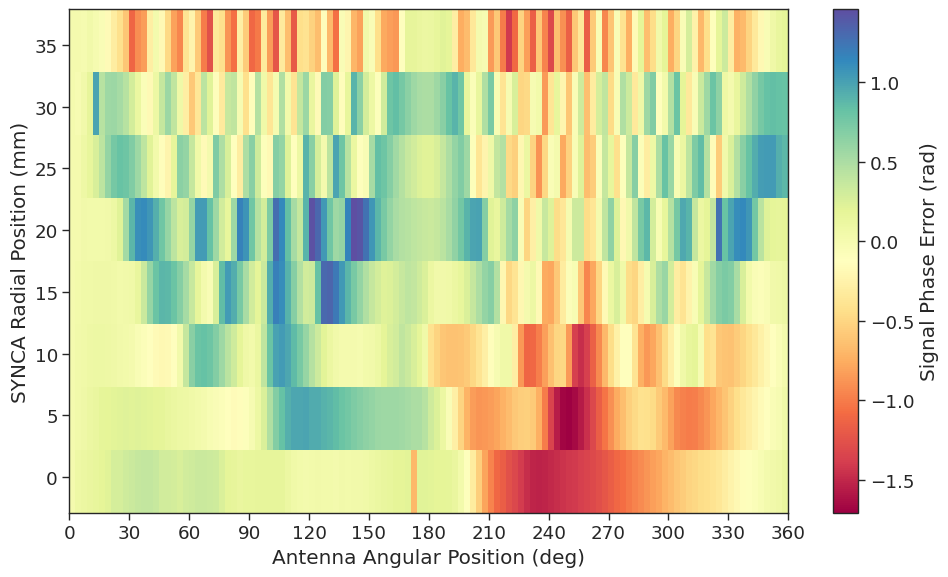

In [13]:
radii = np.arange(-10, 40,5)*0.001
axii = np.arange(0,30,5)

sns.set_theme(context='paper', style='ticks', font_scale=1.5)
clist = sns.color_palette('deep', n_colors=12)
#cmap = sns.diverging_palette(150,300,as_cmap=True)
cmap = sns.color_palette("Spectral",as_cmap=True)
for j in [0]:
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,1,1)

    phases = synth_data[j,:,:]
    #phases = phases - phases.mean(axis=-1)[:,np.newaxis]
    #mags = mags - np.mean(mags) # rescale
    #mags = mags - np.mean(mags) # remove DC


    img = ax.imshow(
        np.flip(phases,axis=0),
        aspect='auto',
        cmap=cmap,
        extent=(0,360,0,35)
    )
    
    ax.set_yticks(np.linspace(2.5,32.5,8))
    ax.set_yticklabels(np.arange(0,40,5))
    ax.set_xticks(np.linspace(0, 360, 13))
    cbar = fig.colorbar(img, label='Signal Phase Error (rad)')
    ax.set_ylabel('SYNCA Radial Position (mm)')
    ax.set_xlabel('Antenna Angular Position (deg)')
    #ax.set_title('Synthetic Array Phase Error Map'+'\n'+f'SYNCA Axial Position={axii[j]} mm')
    plt.tight_layout(pad=1.05)
    name = f'230925_synth_array_phase_error_map_z{axii[j]}'
    #plt.savefig(Path.home()/'group'/'project'/'plots'/name, dpi=150)
    
    
    
    
    

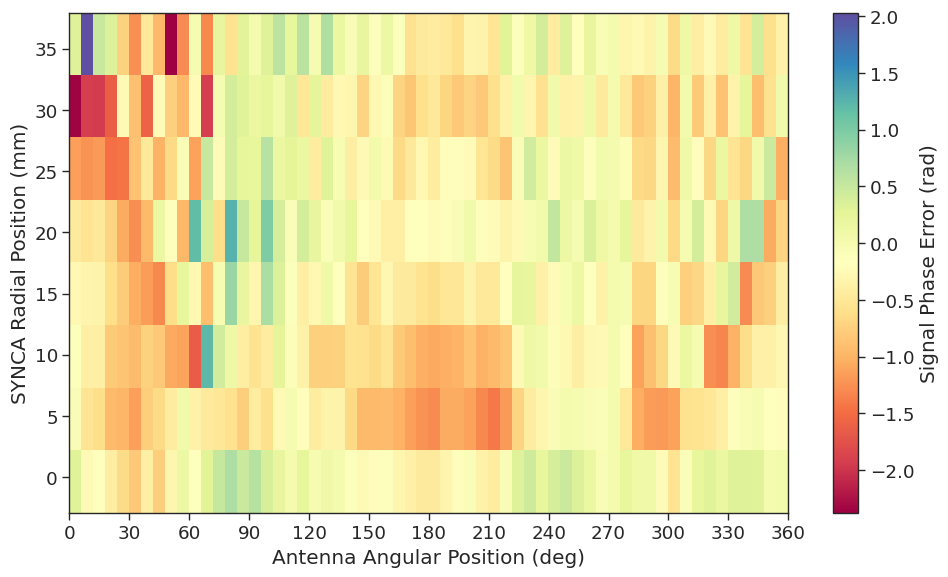

In [23]:
radii = np.arange(-10, 40,5)*0.001
axii = np.arange(0,30,5)
sns.set_theme(context='paper', style='ticks', font_scale=1.5)
clist = sns.color_palette('deep', n_colors=12)
#cmap = sns.diverging_palette(150,300,as_cmap=True)
cmap = sns.color_palette("Spectral",as_cmap=True)

f_0 = 77
f_range = 10

for j in [0]:
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,1,1)

    phases = jugaad_data[j,:,f_0,:]
    #phases = jugaad_data[j,:,f_0:f_0+f_range,:].mean(axis=1)
    
    phases = np.roll(phases, -15, axis=-1)
    
    #print(phases.shape)
    #phases = phases - phases.mean(axis=-1)[:,np.newaxis]
    #mags = mags - np.mean(mags) # rescale
    #mags = mags - np.mean(mags) # remove DC


    img = ax.imshow(
        np.flip(phases,axis=0),
        aspect='auto',
        cmap=cmap,
        extent=(0,360,0,35)
    )
    
    ax.set_yticks(np.linspace(2.5,32.5,8))
    ax.set_yticklabels(np.arange(0,40,5))
    ax.set_xticks(np.linspace(0, 360, 13))
    cbar = fig.colorbar(img, label='Signal Phase Error (rad)')
    ax.set_ylabel('SYNCA Radial Position (mm)')
    ax.set_xlabel('Antenna Angular Position (deg)')
    #ax.set_title('JUGAAD Phase Error Map'+'\n'+f'SYNCA Axial Position={axii[j]} mm')
    plt.tight_layout(pad=1.05)
    name = f'230925_jugaad_phase_error_map_z{axii[j]}'
    plt.savefig(Path.home()/'group'/'project'/'plots'/name, dpi=150)
    